In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


In [ ]:
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

In [ ]:
from torch.utils.data import random_split
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transform,
                                             download=True)

train_ds,val_ds = random_split(train_dataset,[42000,8000])

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False, 
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_ds,
                                           batch_size=32, 
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_ds,
                                          batch_size=32, 
                                          shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=16, 
                                          shuffle=False)



Files already downloaded and verified


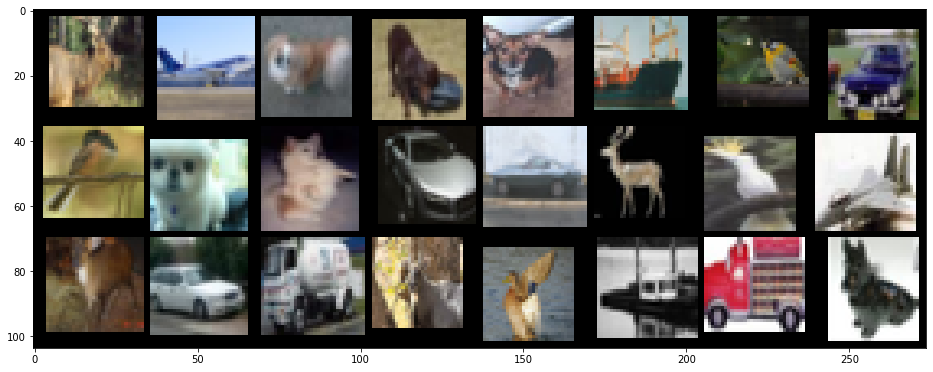

In [ ]:
import matplotlib.pyplot as plt
import numpy
samples, labels = iter(train_loader).next()
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples[:24])
np_grid_imgs = grid_imgs.numpy()
# in tensor, image is (batch, width, height), so you have to transpose it to (width, height, batch) in numpy to show it.
plt.imshow(numpy.transpose(np_grid_imgs, (1,2,0)))

In [ ]:

USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    print('using device: cuda')
else:
    print('using device: cpu')

device = torch.device("cuda:0" if USE_GPU else "cpu")

using device: cuda


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,32,kernel_size=(3,3),padding=(1,1),stride=(1,1))
        self.batch1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32,32,kernel_size=(3,3),padding=(1,1),stride=(1,1))
        self.batch2 = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32,64,kernel_size=(3,3),padding=(1,1),stride=(1,1))
        self.batch3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64,64,kernel_size=(3,3),padding=(1,1),stride=(1,1))
        self.batch4 = nn.BatchNorm2d(64)

        self.conv5 = nn.Conv2d(64,128,kernel_size=(3,3),padding=(1,1),stride=(1,1))
        self.batch5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128,128,kernel_size=(3,3),padding=(1,1),stride=(1,1))
        self.batch6 = nn.BatchNorm2d(128)

        self.conv7 = nn.Conv2d(128,256,kernel_size=(3,3),padding=(1,1),stride=(1,1))
        self.batch7 = nn.BatchNorm2d(256)
        self.conv8 = nn.Conv2d(256,256,kernel_size=(3,3),padding=(1,1),stride=(1,1))
        self.batch8 = nn.BatchNorm2d(256)
        self.conv9 = nn.Conv2d(256,256,kernel_size=(3,3),padding=(1,1),stride=(1,1))
        self.batch9 = nn.BatchNorm2d(256)

        self.conv10 = nn.Conv2d(256,512,kernel_size=(3,3),padding=(1,1),stride=(1,1))
        self.batch10 = nn.BatchNorm2d(512)
        self.conv11 = nn.Conv2d(512,512,kernel_size=(3,3),padding=(1,1),stride=(1,1))
        self.batch11 = nn.BatchNorm2d(512)
        self.conv12 = nn.Conv2d(512,512,kernel_size=(3,3),padding=(1,1),stride=(1,1))
        self.batch12 = nn.BatchNorm2d(512)

        self.pool = nn.MaxPool2d(2,2)

        self.drop1 = nn.Dropout(0.2)
        self.drop2 = nn.Dropout(0.3)
        self.drop3 = nn.Dropout(0.4)
        self.drop4 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512*2*2,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,10)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.batch1(x)
        x = F.relu(self.conv2(x))
        x = self.batch2(x)
        x = self.drop1(x)

        x = F.relu(self.conv3(x))
        x = self.batch3(x)
        x = F.relu(self.conv4(x))
        x = self.batch4(x)
        x = self.pool(x)
        x = self.drop2(x)

        x = F.relu(self.conv5(x))
        x  = self.batch5(x)
        x = F.relu(self.conv6(x))
        x = self.batch6(x)
        x = self.pool(x)
        x = self.drop2(x)

        x = F.relu(self.conv7(x))
        x = self.batch7(x)
        x = F.relu(self.conv8(x))
        x = self.batch8(x)
        x = F.relu(self.conv9(x))
        x = self.batch9(x)
        x  = self.pool(x)
        x = self.drop3(x)

        x = F.relu(self.conv10(x))
        x = self.batch10(x)
        x = F.relu(self.conv11(x))
        x = self.batch11(x)
        x = F.relu(self.conv12(x))
        x = self.batch12(x)
        x = self.pool(x)
        x = self.drop3(x)


        x = x.view(x.shape[0],512*2*2)

        x = F.relu(self.fc1(x))
        x = self.drop4(x)
        x = F.relu(self.fc2(x))
        x = self.drop4(x)
        x = self.fc3(x)

        return x


net = Net()
net = net.to(device)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [ ]:
def model_eval(dataloader):
    total = 0
    correct = 0
    for data in dataloader:
      images, l = data
      
      images = images.to(device)
      l = l.to(device)
      
      out = net(images)
      max_val, preds = torch.max(out,dim=1)
      
      total += l.shape[0]                   
      correct += (preds == l).sum().item()  
      accuracy = (100 * correct)/total
    
    
    return accuracy

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
       
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 300 == 299:    
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 300))
            running_loss = 0.0
  
    print("EPOCH OVER")
    train_acc = model_eval(train_loader)
    test_acc = model_eval(val_loader)
    print("############################")
    print("Training Accuracy:",train_acc,"Testing Accuracy",test_acc)
    print("############################")
    print("")
print('Finished Training')


[1,   300] loss: 2.140
[1,   600] loss: 1.854
[1,   900] loss: 1.730
[1,  1200] loss: 1.636
EPOCH OVER
############################
Training Accuracy: 42.102380952380955 Testing Accuracy 42.8625
############################

[2,   300] loss: 1.513
[2,   600] loss: 1.415
[2,   900] loss: 1.343
[2,  1200] loss: 1.280
EPOCH OVER
############################
Training Accuracy: 55.50476190476191 Testing Accuracy 54.925
############################

[3,   300] loss: 1.211
[3,   600] loss: 1.182
[3,   900] loss: 1.136
[3,  1200] loss: 1.093
EPOCH OVER
############################
Training Accuracy: 62.857142857142854 Testing Accuracy 62.0625
############################

[4,   300] loss: 1.035
[4,   600] loss: 1.027
[4,   900] loss: 0.999
[4,  1200] loss: 0.970
EPOCH OVER
############################
Training Accuracy: 67.67857142857143 Testing Accuracy 65.8
############################

[5,   300] loss: 0.922
[5,   600] loss: 0.907
[5,   900] loss: 0.894
[5,  1200] loss: 0.865
EPOCH OVER
###